In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Data preparation

In [ ]:
df = pd.read_csv("alzheimers_disease_data.csv")

In [ ]:
df = df.drop(['DoctorInCharge', 'PatientID'], axis=1)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

print(categorical_cols)

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))

Index([], dtype='object')


In [ ]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_columns_to_scale = [col for col in num_columns if col not in categorical_cols and col != 'Diagnosis']

num_columns_to_scale

In [ ]:
scaler = StandardScaler()
df[num_columns_to_scale] = scaler.fit_transform(df[num_columns_to_scale])

print("Scaled Numerical Data:")
df[num_columns_to_scale].head()

Scaled Numerical Data:


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,-0.212368,-1.012644,-0.700408,0.788833,-0.655225,-0.636784,0.565923,0.492525,-1.253593,1.119918,...,0.779037,0.497506,-0.512477,-0.431257,-1.104434,-0.508131,-0.433531,-0.421348,2.302619,-0.657048
1,1.567757,-1.012644,-0.700408,-1.422782,-0.114751,-0.636784,-0.954895,0.945093,-1.538442,0.056836,...,0.680297,0.704907,-0.512477,-0.431257,-0.810601,-0.508131,-0.433531,-0.421348,-0.434288,1.521959
2,-0.212368,-1.012644,2.311955,-0.316974,-1.366428,-0.636784,1.653006,1.023896,-1.088855,1.487380,...,-0.859222,0.281813,-0.512477,-0.431257,0.724491,-0.508131,2.306640,-0.421348,2.302619,-0.657048
3,-0.101111,0.987514,-0.700408,-0.316974,0.851625,1.570391,0.376930,1.227995,0.839804,0.760833,...,-0.088723,1.343346,-0.512477,2.318805,0.508044,-0.508131,-0.433531,-0.421348,-0.434288,-0.657048
4,1.567757,-1.012644,-0.700408,-1.422782,-0.961607,-0.636784,1.461793,0.486696,-1.443293,-0.824566,...,-0.143712,0.333665,-0.512477,-0.431257,-1.684679,-0.508131,-0.433531,2.373334,2.302619,-0.657048


## Train

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    confusion_matrix, precision_recall_curve, auc, f1_score
)

np.random.seed(42)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight="balanced",
    random_state=42
  )

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train_full, y_train_full, cv=cv, scoring='roc_auc')

rf_model.fit(X_train_full, y_train_full)

y_pred_train = rf_model.predict(X_train_full)
y_pred_test = rf_model.predict(X_test)
y_pred_proba_test = rf_model.predict_proba(X_test)[:, 1]

#### Evaluate

Cross-Validation AUC: 0.9549 ± 0.0080
Train Accuracy: 0.9878
Test Accuracy: 0.9372
Test ROC-AUC: 0.9432
Test PR-AUC: 0.9282
Test F1-Score: 0.9085

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       278
           1       0.94      0.88      0.91       152

    accuracy                           0.94       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430


Confusion Matrix:
[[269   9]
 [ 18 134]]

Top 10 Important Features:
                     Feature  Importance
23      FunctionalAssessment    0.197232
26                       ADL    0.168249
22                      MMSE    0.134436
24          MemoryComplaints    0.092951
25        BehavioralProblems    0.049274
20            CholesterolHDL    0.028999
6         AlcoholConsumption    0.027814
21  CholesterolTriglycerides    0.027576
8                DietQuality    0.027494
18         

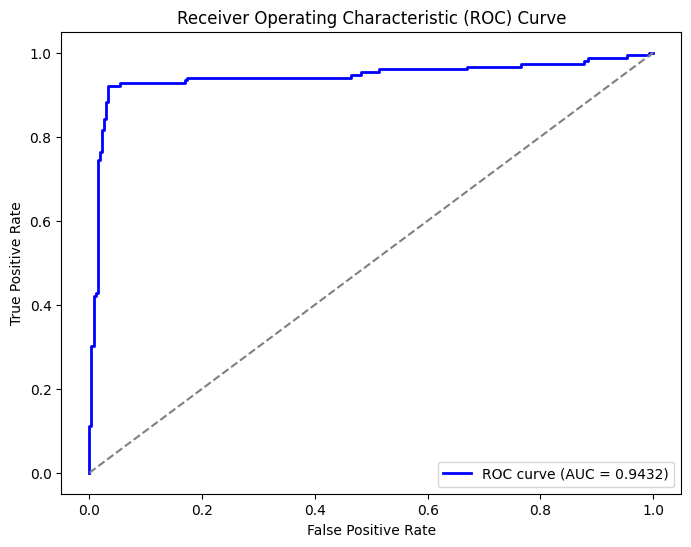

In [ ]:
train_acc = accuracy_score(y_train_full, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_proba_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_test)
pr_auc = auc(recall, precision)
f1 = f1_score(y_test, y_pred_test)

print(f"Cross-Validation AUC: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test ROC-AUC: {roc_auc:.4f}")
print(f"Test PR-AUC: {pr_auc:.4f}")
print(f"Test F1-Score: {f1:.4f}")

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(cm)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importances.head(10))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()